# Julia 基礎圖表繪製：圖表結合敘述統計

## 作業 024：繪製帶統計資訊的圖表

繪製 iris 資料的散佈圖，x 軸為 PetalLength，y 軸為 PetalWidth，並依不同花的種類分別算出 PetalLength 及 PetalWidth 的平均值，將平均值以鉛直線與水平線標在圖上。（請完成以下程式碼）

In [2]:
using StatsBase, RDatasets
using Gadfly

In [3]:
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [16]:
show(iris,allrows=true)

150×5 DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species      │
│     │ Float64     │ Float64    │ Float64     │ Float64    │ Categorical… │
├─────┼─────────────┼────────────┼─────────────┼────────────┼──────────────┤
│ 1   │ 5.1         │ 3.5        │ 1.4         │ 0.2        │ setosa       │
│ 2   │ 4.9         │ 3.0        │ 1.4         │ 0.2        │ setosa       │
│ 3   │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ setosa       │
│ 4   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ setosa       │
│ 5   │ 5.0         │ 3.6        │ 1.4         │ 0.2        │ setosa       │
│ 6   │ 5.4         │ 3.9        │ 1.7         │ 0.4        │ setosa       │
│ 7   │ 4.6         │ 3.4        │ 1.4         │ 0.3        │ setosa       │
│ 8   │ 5.0         │ 3.4        │ 1.5         │ 0.2        │ setosa       │
│ 9   │ 4.4         │ 2.9        │ 1.4         │ 0.2        │ setosa       │
│ 10  │ 4.9         │ 3.1        │ 1.5         │ 0.1        

│ 106 │ 7.6         │ 3.0        │ 6.6         │ 2.1        │ virginica    │
│ 107 │ 4.9         │ 2.5        │ 4.5         │ 1.7        │ virginica    │
│ 108 │ 7.3         │ 2.9        │ 6.3         │ 1.8        │ virginica    │
│ 109 │ 6.7         │ 2.5        │ 5.8         │ 1.8        │ virginica    │
│ 110 │ 7.2         │ 3.6        │ 6.1         │ 2.5        │ virginica    │
│ 111 │ 6.5         │ 3.2        │ 5.1         │ 2.0        │ virginica    │
│ 112 │ 6.4         │ 2.7        │ 5.3         │ 1.9        │ virginica    │
│ 113 │ 6.8         │ 3.0        │ 5.5         │ 2.1        │ virginica    │
│ 114 │ 5.7         │ 2.5        │ 5.0         │ 2.0        │ virginica    │
│ 115 │ 5.8         │ 2.8        │ 5.1         │ 2.4        │ virginica    │
│ 116 │ 6.4         │ 3.2        │ 5.3         │ 2.3        │ virginica    │
│ 117 │ 6.5         │ 3.0        │ 5.5         │ 1.8        │ virginica    │
│ 118 │ 7.7         │ 3.8        │ 6.7         │ 2.2        │ virginica    │

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[20]:2
└ @ Core In[20]:2


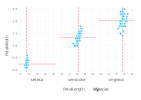

In [20]:
iris = dataset("datasets", "iris")
sp = unique(iris[:Species])

setosa_w = mean(iris[(iris.Species .== "setosa"),:PetalWidth])
versicolor_w = mean(iris[(iris.Species .== "versicolor"),:PetalWidth])
virginica_w = mean(iris[(iris.Species .== "virginica"),:PetalWidth]) 
Dh1 = DataFrame(yint=[setosa_w, versicolor_w, virginica_w], Species=repeat(sp, inner=[1]))

setosa_l = mean(iris[(iris.Species .== "setosa"),:PetalLength])
versicolor_l = mean(iris[(iris.Species .== "versicolor"),:PetalLength])
virginica_l = mean(iris[(iris.Species .== "virginica"),:PetalLength]) 
Dh2 = DataFrame(yint=[setosa_l, versicolor_l, virginica_l], Species=repeat(sp, inner=[1]))

p = plot(iris, xgroup="Species", x="PetalLength", y="PetalWidth",
    Geom.subplot_grid(
        layer(Geom.point),
        layer(Dh1, xgroup=:Species, yintercept=:yint, Geom.hline(color="red", style=:dot)),
        layer(Dh2, xgroup=:Species, xintercept=:yint, Geom.vline(color="red", style=:dot))
    )
)